# 1. Setup

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 2. Load Dataset

In [2]:
data = pd.read_csv("housing.csv")
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


# 3. Data Exploration

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


**Observation:**  
- `total_bedrooms` has 207 null values, which is approximately 1% of the data. So, we can just drop them.

In [4]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


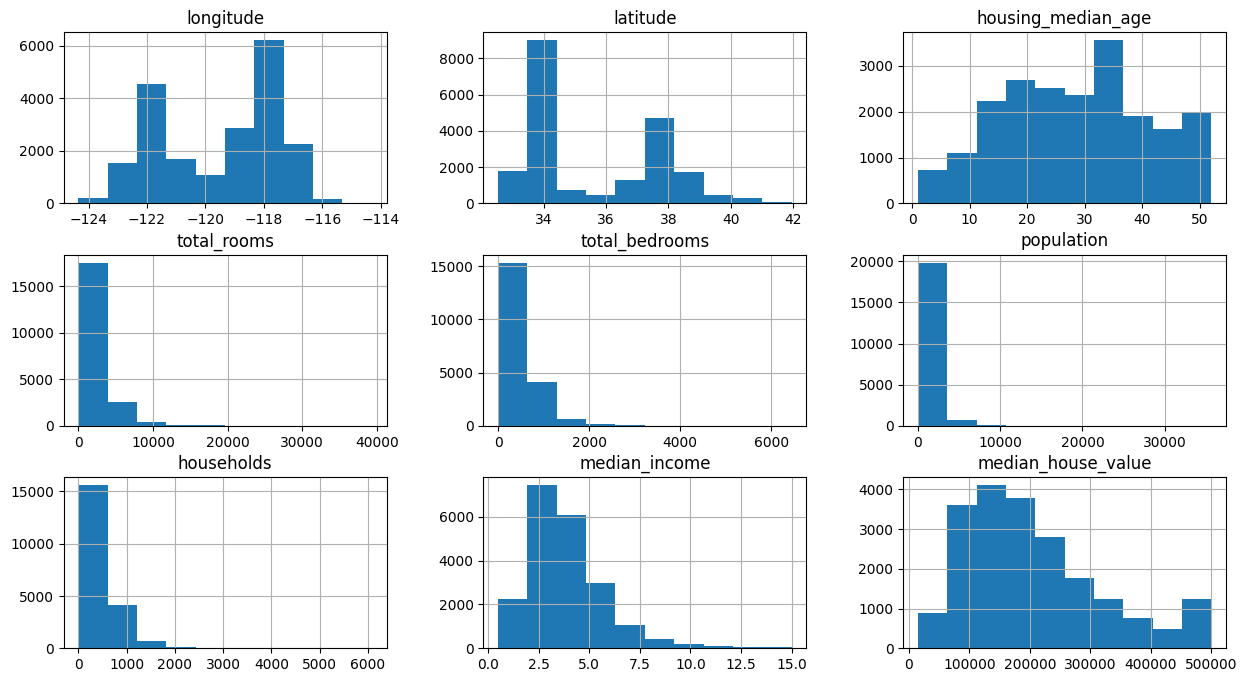

In [5]:
data.hist(figsize=(15,8))
data.dropna(inplace=True)

**Observation:**  
- Most histograms are right screwed

<Axes: >

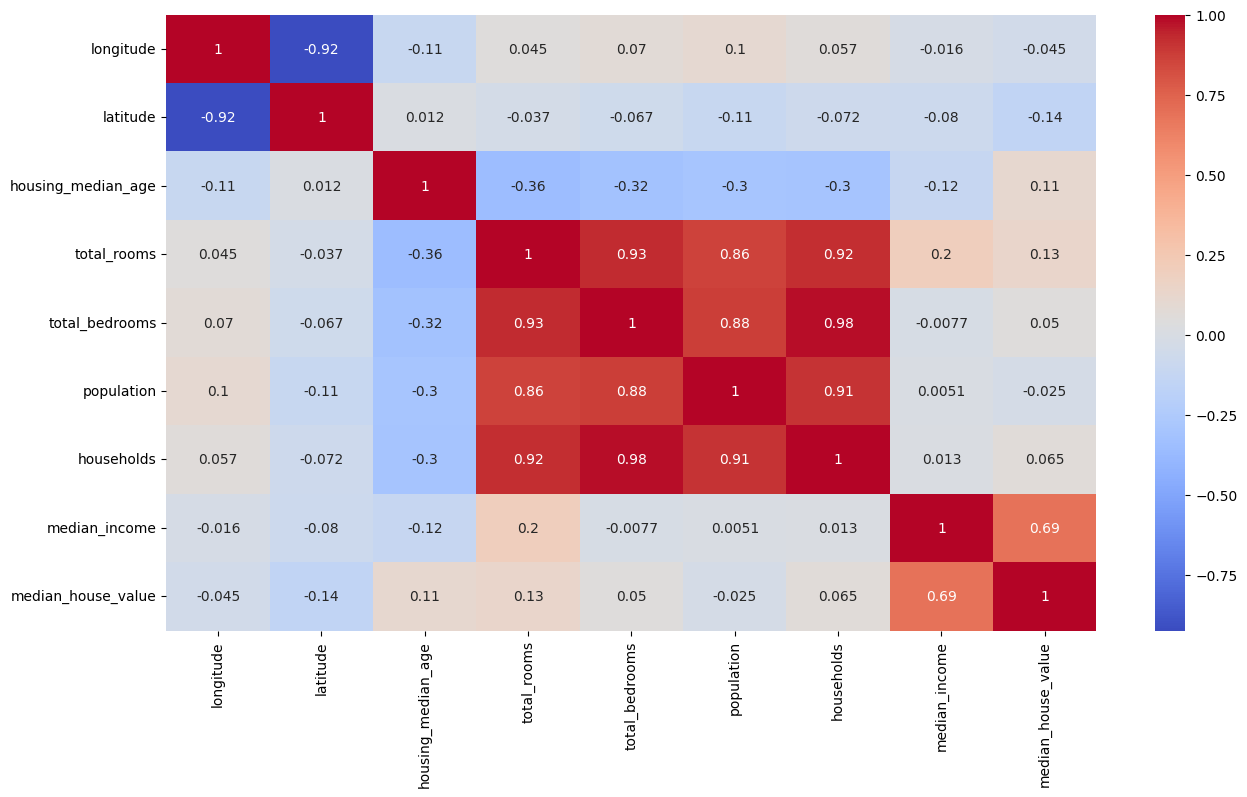

In [6]:
plt.figure(figsize=(15,8))
sns.heatmap(data.select_dtypes(include='number').corr(),annot=True,cmap='coolwarm')

**Observation:**  
- `median_income` and the target `median_house_value` have a strong correlation.

# 4. Data Preprocessing

In [7]:
# Train Test Validation split
from sklearn.model_selection import train_test_split

X = data.drop(['median_house_value'], axis = 1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


array([[<Axes: title={'center': 'longitude'}>,
        <Axes: title={'center': 'latitude'}>,
        <Axes: title={'center': 'housing_median_age'}>],
       [<Axes: title={'center': 'total_rooms'}>,
        <Axes: title={'center': 'total_bedrooms'}>,
        <Axes: title={'center': 'population'}>],
       [<Axes: title={'center': 'households'}>,
        <Axes: title={'center': 'median_income'}>,
        <Axes: title={'center': 'median_house_value'}>]], dtype=object)

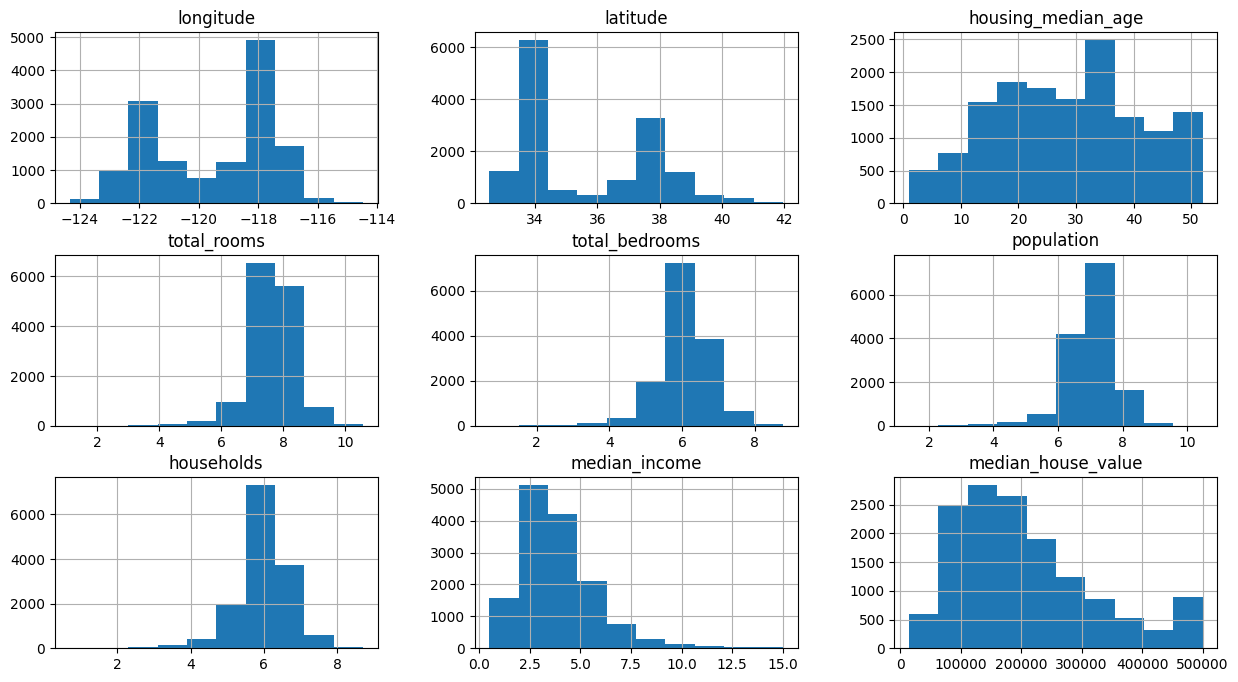

In [8]:
train_data = X_train.join(y_train)

# log normal tranformation for the right sckewed columns
train_data['total_rooms'] = np.log1p(train_data['total_rooms'])
train_data['total_bedrooms'] = np.log1p(train_data['total_bedrooms'])
train_data['population'] = np.log1p(train_data['population'])
train_data['households'] = np.log1p(train_data['households'])

train_data.hist(figsize=(15,8))

In [9]:
train_data["ocean_proximity"].value_counts()

ocean_proximity
<1H OCEAN     6349
INLAND        4542
NEAR OCEAN    1822
NEAR BAY      1586
ISLAND           4
Name: count, dtype: int64

In [10]:
train_data = train_data.join(pd.get_dummies(train_data.ocean_proximity).astype(int))

train_data = train_data.drop('ocean_proximity', axis=1)

train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,ISLAND,NEAR BAY,NEAR OCEAN
5249,-118.45,34.08,52.0,7.313887,5.176150,5.953243,4.983607,7.1576,500001.0,1,0,0,0,0
5107,-118.31,33.94,43.0,7.652071,5.976351,7.032624,5.978886,3.0682,142000.0,1,0,0,0,0
13688,-117.20,34.15,18.0,7.528332,5.529429,6.617403,5.549076,7.7320,173200.0,0,1,0,0,0
5080,-118.30,33.98,48.0,7.606387,6.100319,7.097549,6.003887,1.6611,95800.0,1,0,0,0,0
4581,-118.28,34.06,17.0,7.831617,7.087574,8.023552,6.908755,1.7199,175000.0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,-121.45,38.57,48.0,7.582229,5.877736,6.558198,5.894403,3.5313,147900.0,0,1,0,0,0
6809,-118.11,34.10,20.0,8.036250,6.688355,7.654443,6.605298,3.3801,192500.0,1,0,0,0,0
13063,-121.33,38.56,17.0,8.191186,6.526495,7.435438,6.502790,3.3110,109400.0,0,1,0,0,0
17195,-119.75,34.45,26.0,8.182839,6.519147,7.316548,6.428105,4.1375,395000.0,0,0,0,0,1


<Axes: >

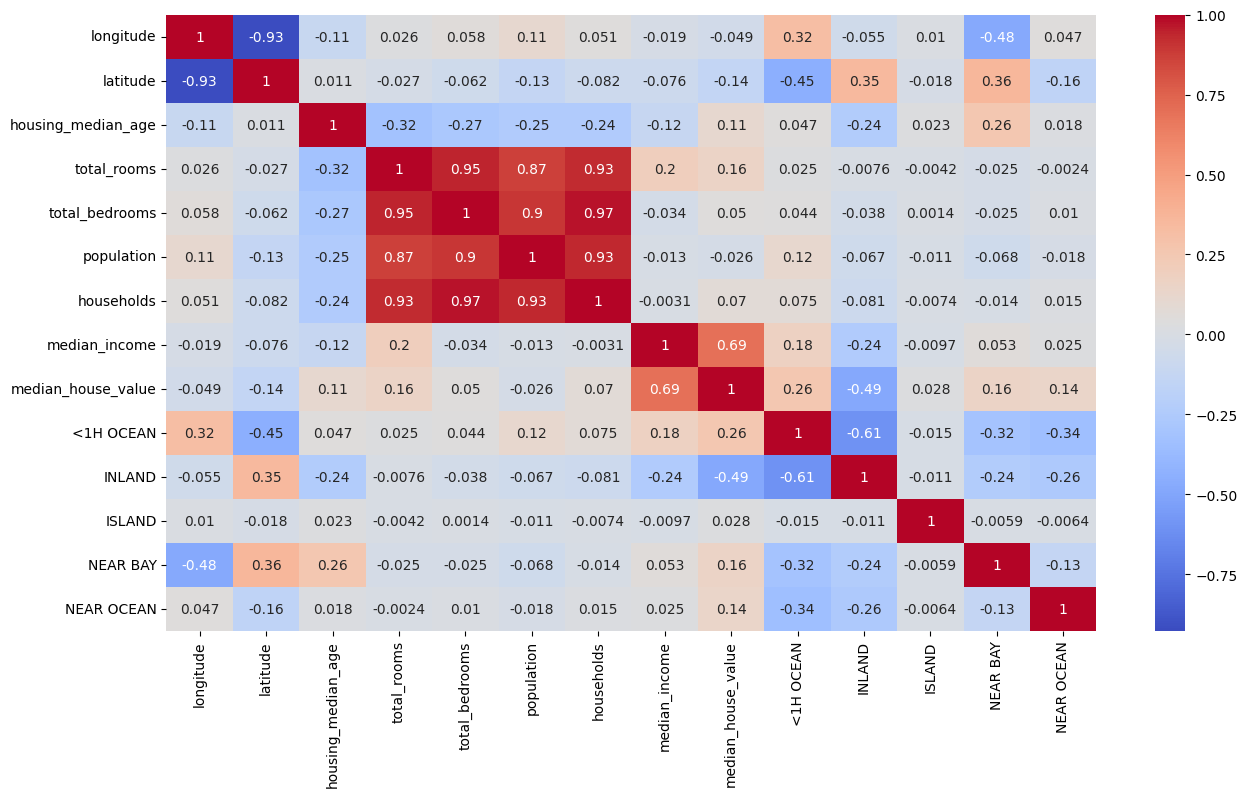

In [11]:
plt.figure(figsize=(15,8))
sns.heatmap(train_data.corr(),annot=True,cmap='coolwarm')

**Observation:**  
- Now we can see that `<1H Ocean` has high correlation and `inland` has negative correlation with `median_house_value`

<Axes: xlabel='latitude', ylabel='longitude'>

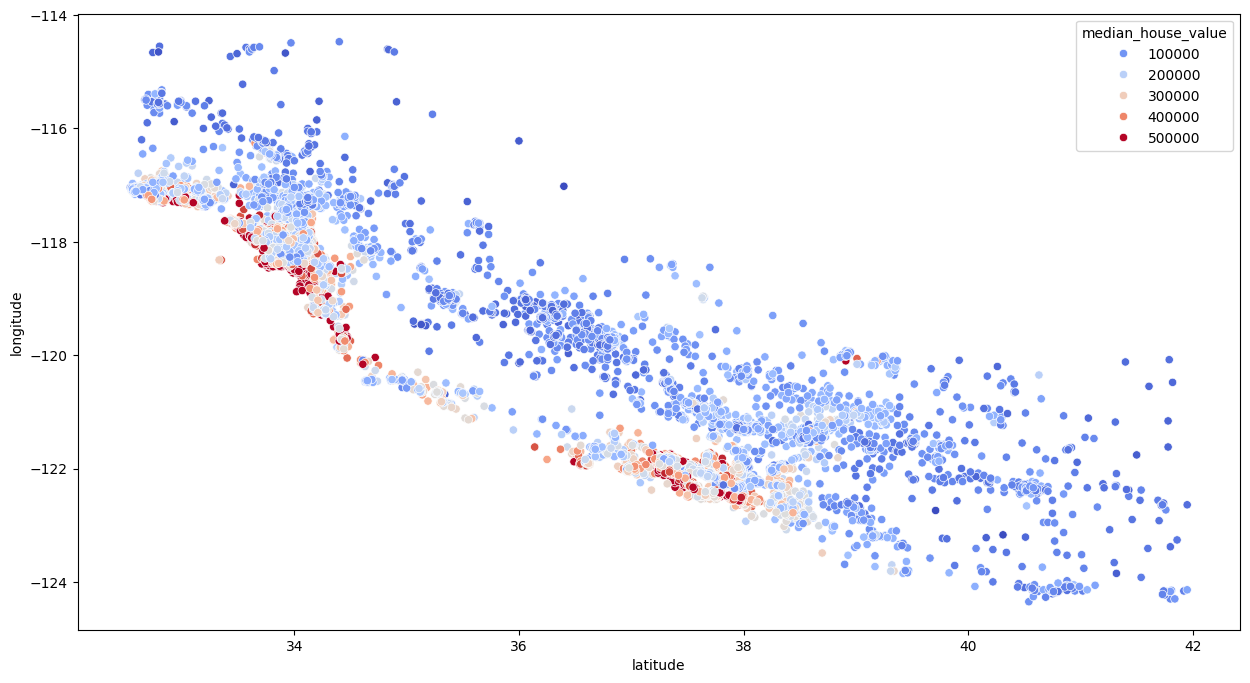

In [12]:
# Since we have the latitue and longitude lets visualize the the speadout
plt.figure(figsize=(15,8))
sns.scatterplot(x='latitude', y='longitude', data=train_data, hue = 'median_house_value', palette='coolwarm')

# 5.1 Feature Engineering

In [ ]:
train_data['rooms_per_household'] = np.log1p(train_data['total_rooms']/train_data['households'])
train_data['bedroom_ratio'] = np.log1p(train_data['total_bedrooms']/train_data['total_rooms'])

In [14]:
train_data = train_data.drop("ISLAND", axis=1)
train_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio,income_per_household
5249,-118.45,34.08,52.0,7.313887,5.176150,5.953243,4.983607,7.1576,500001.0,1,0,0,0,0.903242,0.535156,0.890451
5107,-118.31,33.94,43.0,7.652071,5.976351,7.032624,5.978886,3.0682,142000.0,1,0,0,0,0.824109,0.577181,0.414208
13688,-117.20,34.15,18.0,7.528332,5.529429,6.617403,5.549076,7.7320,173200.0,0,1,0,0,0.857255,0.550709,0.872709
5080,-118.30,33.98,48.0,7.606387,6.100319,7.097549,6.003887,1.6611,95800.0,1,0,0,0,0.818418,0.588897,0.244256
4581,-118.28,34.06,17.0,7.831617,7.087574,8.023552,6.908755,1.7199,175000.0,1,0,0,0,0.757801,0.644479,0.222299
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12469,-121.45,38.57,48.0,7.582229,5.877736,6.558198,5.894403,3.5313,147900.0,0,1,0,0,0.826954,0.573912,0.469437
6809,-118.11,34.10,20.0,8.036250,6.688355,7.654443,6.605298,3.3801,192500.0,1,0,0,0,0.795991,0.605557,0.413252
13063,-121.33,38.56,17.0,8.191186,6.526495,7.435438,6.502790,3.3110,109400.0,0,1,0,0,0.815206,0.585991,0.411557
17195,-119.75,34.45,26.0,8.182839,6.519147,7.316548,6.428105,4.1375,395000.0,0,0,0,1,0.821091,0.585943,0.496924


# 6. Linear Regression

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()



# Split the train data again
X_train = train_data.drop(['median_house_value'], axis = 1)
y_train = train_data['median_house_value']

X_train = scaler.fit_transform(X_train)

reg = LinearRegression()

reg.fit(X_train, y_train)

LinearRegression()

In [16]:
test_data = X_test.join(y_test)

In [17]:
from preprocessing import preprocessing

test_data = preprocessing(test_data)

test_data = test_data.drop("ISLAND", axis=1)

test_data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,<1H OCEAN,INLAND,NEAR BAY,NEAR OCEAN,rooms_per_household,bedroom_ratio,income_per_household
629,-122.17,37.72,42.0,8.009363,6.492240,7.505492,6.499787,3.3710,165000.0,0,0,1,0,0.803010,0.593648,0.417810
16995,-122.26,37.54,5.0,8.091015,6.093570,7.382746,6.118097,9.1415,500001.0,0,0,1,0,0.842632,0.561402,0.913957
1076,-121.80,39.75,11.0,8.883640,7.212294,8.091015,7.142827,3.1125,122600.0,0,1,0,0,0.808133,0.594355,0.361689
19675,-121.62,39.16,7.0,8.407602,6.655440,7.728416,6.643790,3.8090,110700.0,0,1,0,0,0.817788,0.583108,0.453186
10647,-117.80,33.53,41.0,7.609862,6.194405,6.664409,6.001415,4.1591,500001.0,1,0,0,0,0.818903,0.595533,0.526514
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8197,-118.14,33.80,43.0,7.826842,6.276643,7.115582,6.298949,3.4211,203900.0,0,0,0,1,0.807619,0.588863,0.433808
1121,-121.58,39.79,19.0,7.877397,6.261492,7.077498,6.144186,2.7863,108600.0,0,1,0,0,0.825092,0.584932,0.373965
17097,-122.23,37.46,26.0,8.449128,6.946976,7.651596,6.839476,4.4167,333800.0,0,0,0,1,0.804397,0.600051,0.498206
7005,-118.06,33.97,37.0,7.406103,5.733341,6.982863,5.771441,4.3203,159200.0,1,0,0,0,0.825592,0.573314,0.558796


In [18]:
# Split the test data again
X_test = test_data.drop(['median_house_value'], axis = 1)
y_test = test_data['median_house_value']


X_test = scaler.transform(X_test)

In [19]:
reg.score(X_test, y_test)

0.6482747799291271

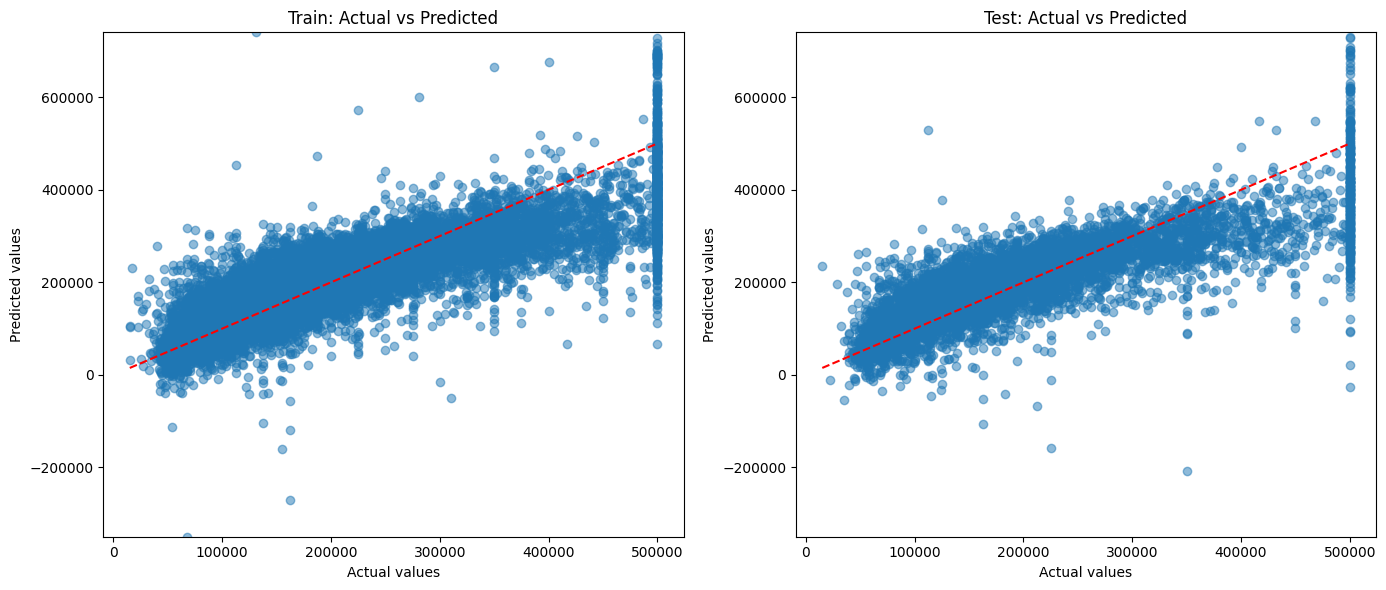

In [20]:
import matplotlib.pyplot as plt

y_train_pred = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

plt.figure(figsize=(14, 6))

# Training set
plt.subplot(1, 2, 1)
plt.scatter(y_train, y_train_pred, alpha=0.5)
plt.plot([min(y_train), max(y_train)], [min(y_train), max(y_train)], color='red', linestyle='--')
plt.title('Train: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max)


# Testing set
plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Test: Actual vs Predicted')
plt.xlabel('Actual values')
plt.ylabel('Predicted values')

y_min = min(y_train.min(), y_test.min(), y_train_pred.min(), y_test_pred.min())
y_max = max(y_train.max(), y_test.max(), y_train_pred.max(), y_test_pred.max())

plt.ylim(y_min, y_max) 


plt.tight_layout()
plt.show()
